# CMSE 201 First Project Checkpoint

### &#9989; Aaron Ko, Sit Soe, Sean O'Dwyer, Abdulla Alblooshi
### &#9989; Section_001

## Background and Motivation

PLACEHOLDER

## Methodology

We will analyze our data using pandas, numpy, and python functions.

### First, lets import everything we'll need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Now that we have all our packages, lets start reading in our dataset that we'll need to answer our question

#### CSV file that will be used:
`FirstYearGPA.csv` contains data about first year college student's GPA as well as their high school GPA, SAT scores, among other things.

### Cleaning up the dataset:

In [2]:
data = pd.read_csv("FirstYearGPA.csv")
# Remove unamed column
data = data.drop(columns = ['Unnamed: 0'])

data

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1


### Combine the SATV and SATM data in to one column that represents the total SAT score

In [3]:
# If model is accurate/inaccurate reseperate SAT columns

# combine the two columns
# data["SATV"] = data["SATV"]+data["SATM"]
# # drop the SATM column
# data = data.drop("SATM", axis = 1)
# # rename the SATV (combined score) column to SAT Score
# data.rename(columns = {"SATV":"SAT Score"}, inplace = True)


### Drop NA and unnecessary columns in the data:

In [4]:
data = data.dropna()
data.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


In [5]:
# Logistic regression would not work if information is classified into multiple gorups
# https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
# Can advance towards SVM after multinomial

In [6]:
# Can use linear regression model to predict our GPA based on HSGPA and SAT, 
# find the variance between true GPA and predicted GPA to determine accuracy of model
# How does different features affect the model

In [7]:
attr_names = [ "HSGPA", "SATV", 'SATM', "Male" , "HU", "SS", "FirstGen", "White", "CollegeBound"]

x_train = data[attr_names]
y_train = data['GPA']


model_log = sm.OLS(y_train, sm.add_constant(x_train))
results = model_log.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     12.48
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           8.67e-16
Time:                        13:34:34   Log-Likelihood:                -95.669
No. Observations:                 219   AIC:                             211.3
Df Residuals:                     209   BIC:                             245.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5269      0.349      1.511   

                   GPA     HSGPA      SATV      SATM      Male        HU  \
GPA           1.000000  0.446887  0.304311  0.194344  0.052849  0.314656   
HSGPA         0.446887  1.000000  0.210321  0.152840 -0.090317  0.116031   
SATV          0.304311  0.210321  1.000000  0.526944  0.145557  0.098749   
SATM          0.194344  0.152840  0.526944  1.000000  0.370992 -0.009602   
Male          0.052849 -0.090317  0.145557  0.370992  1.000000 -0.018844   
HU            0.314656  0.116031  0.098749 -0.009602 -0.018844  1.000000   
SS           -0.003569 -0.017254 -0.026470 -0.087840  0.035076 -0.306608   
FirstGen     -0.156577  0.064186 -0.256577 -0.177387 -0.076105 -0.212566   
White         0.281772  0.046047  0.368234  0.259465  0.076960  0.125934   
CollegeBound -0.063025 -0.200039  0.064845  0.039322  0.099818 -0.029972   

                    SS  FirstGen     White  CollegeBound  
GPA          -0.003569 -0.156577  0.281772     -0.063025  
HSGPA        -0.017254  0.064186  0.046047   

<AxesSubplot:>

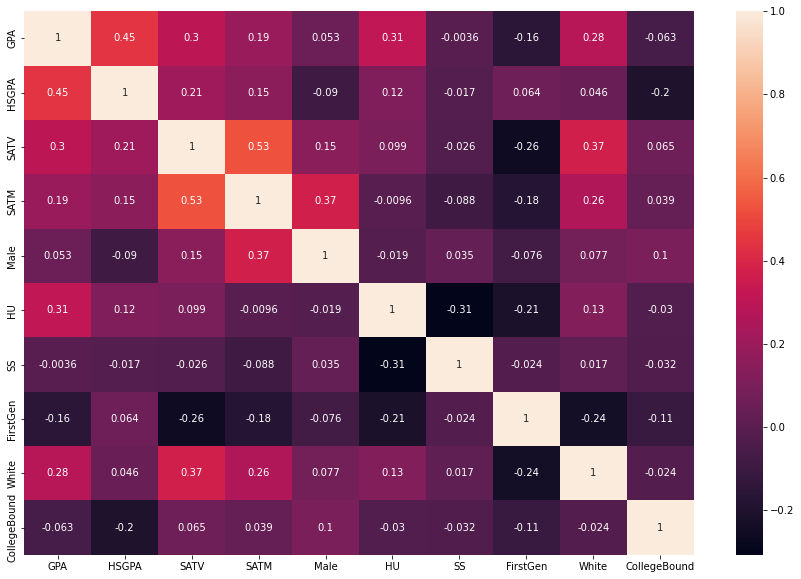

In [8]:
import os
import seaborn as sn
 

numeric_col = ["GPA", "HSGPA", "SATV", 'SATM', "Male" , "HU", "SS", "FirstGen", "White", "CollegeBound"]
 
# Correlation Matrix formation 
corr_matrix = data.loc[:,numeric_col].corr()
print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(corr_matrix, annot=True)

eval_env: 1


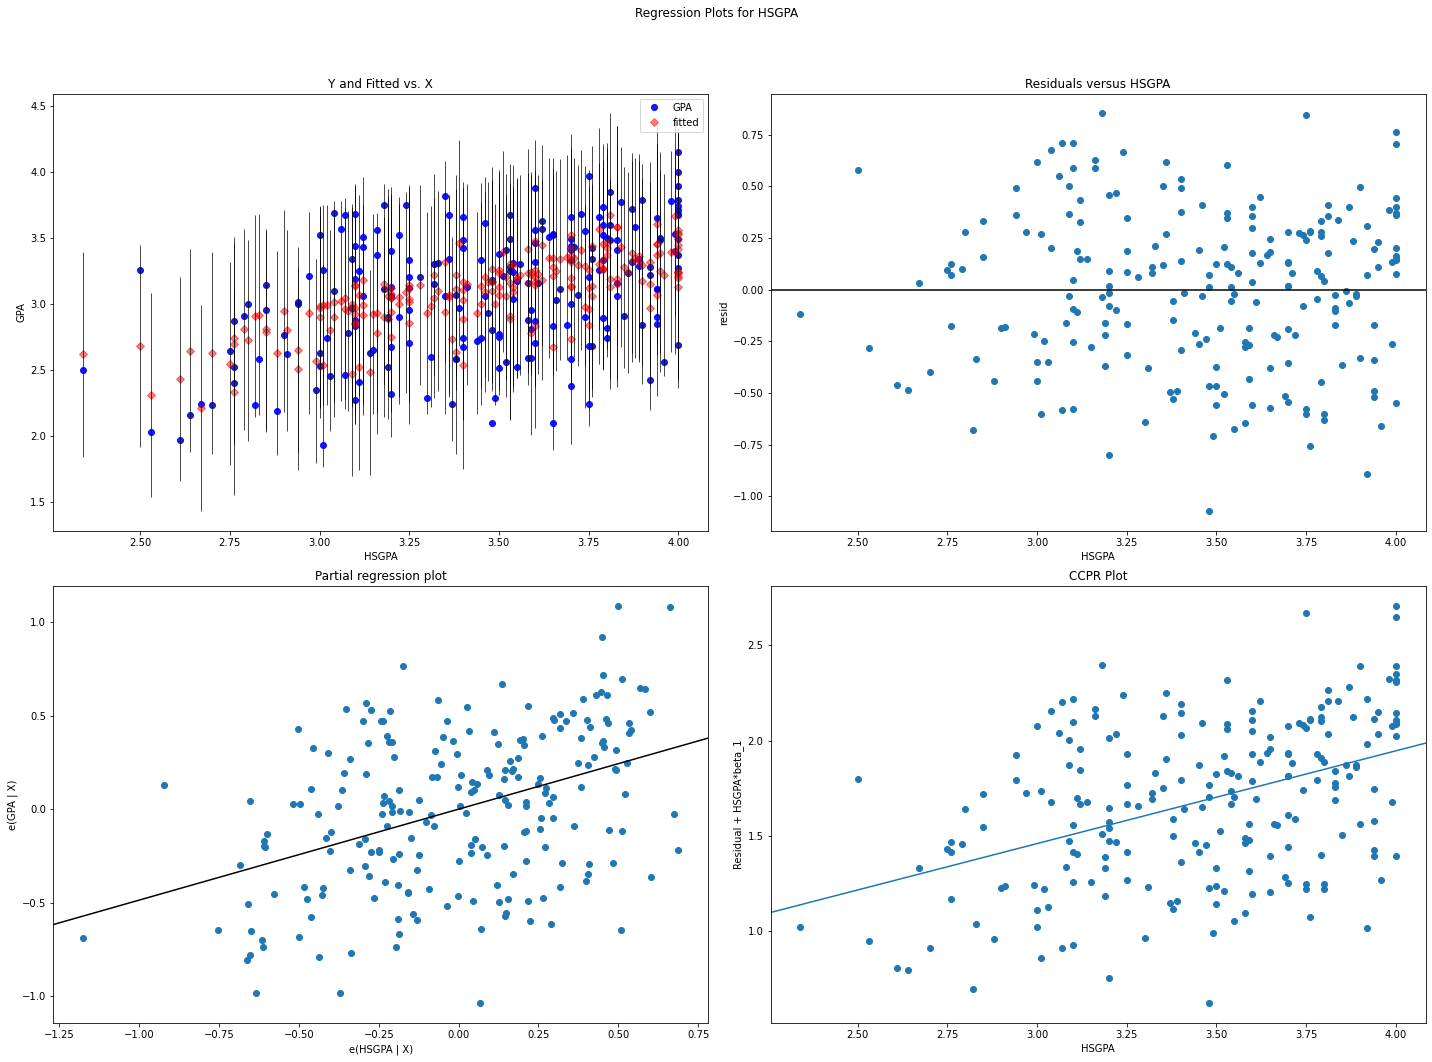

In [77]:
fig = plt.figure(figsize = [20,15])
fig = sm.graphics.plot_regress_exog(results1, "HSGPA", fig = fig)
plt.show()

In [9]:
# Remove and experiment based on either heatmap or P-Values but not both

attr_names1 = [ "HSGPA", "SATV", "HU", "FirstGen", "White"]

x_train1 = data[attr_names1]
y_train1 = data['GPA']


model_log1 = sm.OLS(y_train1, sm.add_constant(x_train1))
results1 = model_log1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     22.02
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           9.13e-18
Time:                        13:34:35   Log-Likelihood:                -97.146
No. Observations:                 219   AIC:                             206.3
Df Residuals:                     213   BIC:                             226.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6774      0.281      2.411      0.0

In [10]:
# Visualize data
# Linear Regression Model
# Individual Regression model for every column. Analyze P-Values, R-Values
# Might not be enough, will start multinomial logisitic regression 
# Divide into quarters. If your grade is in the lower quarter, you go to the lower grade: Higher quarter goes to higher grade

In [72]:
X = data[attr_names1]
y = data.GPA.astype(int)

from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import confusion_matrix

#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
accuracy = svm_model_linear.score(X_test, y_test)
#accuracy
cm = confusion_matrix(y_test, svm_predictions)
#cm
# when y is switched to float, continuous error pops up
print("The accuracy score for the model is:", accuracy)

The accuracy score for the model is: 0.6


Explained variance ratio: [0.99257094 0.00737669]


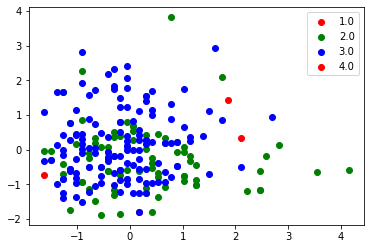

In [91]:
from sklearn.decomposition import PCA 
from itertools import cycle

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
print('Explained variance ratio:', pca.explained_variance_ratio_)

# need to find different colors
colors = cycle('rgb')
target_names = [1.0, 2.0, 3.0, 4.0]

plt.figure()

target_list = np.array(y).flatten()
for t_name, c in zip(target_names, colors):
    plt.scatter(X_pca[target_list == t_name, 0], X_pca[target_list ==t_name, 1], c=c, label=t_name)

plt.legend()
plt.show()




## Results

PLACEHOLDER

## Conclusion

PLACEHOLDER

## Refrences

PLACEHOLDER